#Question 2: SVM



In [113]:
import numpy as np
from sklearn.svm import SVC
from cvxopt import matrix, solvers
from sklearn import metrics

n = 100
x = np.random.uniform(-3,3,(100,2))
for i in range(100):
  x[i][0]=np.random.uniform(-3,3)
  x[i][1]=np.random.uniform(-3,3)
y = np.random.randint(-1,1,(n,1))
a = np.array([[1,0], [0,1]])
s = np.std(a)
w = np.random.normal(0,s,(2,1))
b = np.random.normal(0,1)

def predict(x,b,w):
  if ((np.dot(w.T,x)+b)) > 0:
    return 1
  else:
    return -1

for i in range(n):
  y[i]=predict(x[i],b,w)
print(w)

[[-0.21993074]
 [-0.60647699]]


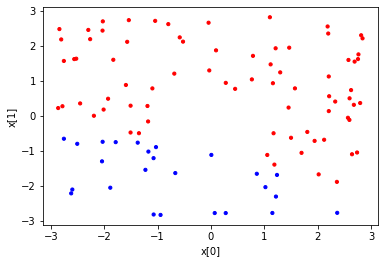

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(x[:,0], x[:,1], c=['red' if y_i == -1 else 'blue' for y_i in y], facecolors='none',s=10 )
plt.ylabel('x[1]')
plt.xlabel('x[0]')

plt.show()



In [0]:
def train_svm(xq,yq,c):
    P=np.zeros(shape=(103,103))
    P[0][0]=0.5
    P[1][1]=0.5
    q=np.zeros(shape=(103,1))
    for i in range(2,102):
      q[i]=c
    G=np.zeros(shape=(200,103))
    for i in range(100):
      G[i][102]=-1*yq[i]
      for j in range(2):
        G[i][j]= -(yq[i]*xq[i][j])
    for i1 in range(100):
      for j1 in range(2,102):
        if j1-i1==2:
          G[i1][j1]=-1
    for i in range(100,200):
      for j in range(2,102):
        if i-j == 98:
          G[i][j]=-1
    h=np.zeros(shape=(200,1))
    for i in range(100):
      h[i]=-1.0
    
    P1=matrix(P,tc='d')
    q1=matrix(q,tc='d')
    G1=matrix(G,tc='d')
    h1=matrix(h,tc='d')
    #A=matrix(y)
    
    sol = solvers.qp(P1, q1, G1, h1)
    return sol


In [0]:
def acc(xin,yin,bo,wo,t):
  t1=t
  y_pred= np.random.randint(-1,1,(t1,1))
  for i in range(t1):
    y_pred[i] = predict(xin[i],bo,wo)
  print("Accuracy:",metrics.accuracy_score(yin, y_pred))
  return metrics.accuracy_score(yin,y_pred)

In [117]:
def call_fun(x_vec,y_vec):
  margin=np.zeros((500,1))
  accuracy=np.zeros((500,1))
  w_vec=np.zeros((500,2))
  b_vec=np.zeros((500,1))
  w_opt=np.zeros((2,1))
  c_vec=np.zeros((500,1))
  b_opt=0
  C=0.0001
  iteration=500
  for it in range(iteration):
      C+=0.1
      x1=x_vec
      y1=y_vec
      svm_parameters = train_svm(x1,y1,C)
      alphas = np.array(svm_parameters['x'])
      w_opt[0]=alphas[0]
      w_opt[1]=alphas[1]
      b_opt=alphas[102]
      epsilon=acc(x_vec,y_vec,b_opt,w_opt,len(x_vec))
      margin_t = 1 / np.sqrt(np.sum(np.power(w_opt,2)))
      margin[it]=margin_t
      accuracy[it]=epsilon
      w_vec[it][0]=w_opt[0]
      w_vec[it][1]=w_opt[1]
      b_vec[it]=b_opt
      c_vec[it]=C
  return margin,accuracy,w_vec,b_vec,c_vec
m1,a1,w1,b1,c1=call_fun(x,y)
max_a=0.0
max_m=np.zeros((2,1))
max_w=0.0
max_b=0.0
max_c=0.0
for i in range(len(a)):
  if a1[i]>max_a:
    max_a,max_m,max_w,max_b,max_c=a1[i],m1[i],w1[i],b1[i],c1[i]
  elif a1[i]==max_a and m1[i]>max_m:
    max_a,max_m,max_w,max_b,max_c=a1[i],m1[i],w1[i],b1[i],c1[i]
print('optimal accuracy is:', max_a)
print('optimal margin is:', max_m)
print('optimal weight is:', max_w)
print('optimal b is:', max_b)
print('optimal c is:', max_c)

Streaming output truncated to the last 5000 lines.
 5:  5.5254e+01  3.7006e+01  2e+01  3e-03  5e-04
 6:  5.0544e+01  4.2423e+01  1e+01  1e-03  2e-04
 7:  4.7802e+01  4.5237e+01  3e+00  4e-15  5e-14
 8:  4.6457e+01  4.6392e+01  6e-02  4e-15  1e-13
 9:  4.6427e+01  4.6427e+01  7e-04  4e-15  1e-13
10:  4.6427e+01  4.6427e+01  7e-06  3e-15  3e-12
11:  4.6427e+01  4.6427e+01  7e-08  4e-15  3e-13
12:  4.6427e+01  4.6427e+01  7e-10  4e-15  1e-13
Optimal solution found.
Accuracy: 0.99
     pcost       dcost       gap    pres   dres
 0: -2.7952e+04  1.3784e+04  4e+04  4e+01  5e+00
 1: -1.6480e+03 -1.7824e+03  7e+03  5e+00  7e-01
 2: -3.3094e+02 -4.3457e+02  1e+03  8e-01  1e-01
 3:  3.5293e+01 -3.3756e+01  2e+02  8e-02  1e-02
 4:  4.3741e+01  2.3026e+01  4e+01  2e-02  2e-03
 5:  5.5348e+01  3.7028e+01  2e+01  3e-03  5e-04
 6:  5.0694e+01  4.2453e+01  1e+01  1e-03  2e-04
 7:  4.8205e+01  4.5155e+01  3e+00  3e-15  2e-14
 8:  4.6609e+01  4.6527e+01  8e-02  3e-15  1e-13
 9:  4.6572e+01  4.6571e+01  

In [118]:
x_test_1=np.zeros((50,2))
for i in range(50):
  x_test_1[i][0]=np.random.uniform(-3,3)
  x_test_1[i][1]=np.random.uniform(-3,3)
y_test_1=np.zeros((50,1))
for i in range(50):
  y_test_1[i]=predict(x_test_1[i],b,w)
print(acc(x_test_1,y_test_1,max_b,max_w,50))

Accuracy: 1.0
1.0


Text(0, 0.5, 'x_2_train[1]')

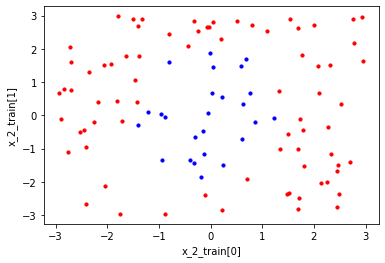

In [119]:
def new_predict(x):
  if(np.power(x[0],2) + np.power(x[1],2)/2) <= 2:
    return 1.0
  else:
    return -1.0
x_2_train = np.random.uniform(-3,3,(100,2))
for i in range(100):
  x_2_train[i][0]=np.random.uniform(-3,3)
  x_2_train[i][1]=np.random.uniform(-3,3)
y_2_train = np.zeros(shape=(100,1))
for i in range(100):
  y_2_train[i] = new_predict(x_2_train[i])
#plt.scatter(x_2_train[:,[0]], x_2_train[:,1], c=['red' if y_i == -1.0 else 'blue' for y_i in y_2_train], facecolors='none')
for i in range(100):
  if y_2_train[i]==-1.0:
    plt.scatter(x_2_train[i][0],x_2_train[i][1],color='red',s=10)
  else:
        plt.scatter(x_2_train[i][0],x_2_train[i][1],color='blue',s=10)
plt.xlabel('x_2_train[0]')
plt.ylabel('x_2_train[1]')

In [120]:
m2c,a2c,w2c,b2c,c2c=call_fun(x_2_train,y_2_train)
max_a2c=0.0
max_m2c=np.zeros((2,1))
max_w2c=0.0
max_b2c=0.0
max_c2c=0.0
for iq in range(len(a2c)):
  if a2c[iq]>max_a2c:
    max_a2c,max_m2c,max_w2c,max_b2c,max_c2c=a2c[iq],m2c[iq],w2c[iq],b2c[iq],c2c[iq]
  elif a2c[i]==max_a2c and m2c[i]>max_m2c:
    max_a2c,max_m2c,max_w2c,max_b2c,max_c2c=a2c[iq],m2c[iq],w2c[iq],b2c[iq],c2c[iq]
print('optimal accuracy is:', max_a2c)
print('optimal margin is:', max_m2c)
print('optimal weight is:', max_w2c)
print('optimal b is:', max_b2c)
print('optimal c is:', max_c2c)

Streaming output truncated to the last 5000 lines.
Optimal solution found.
Accuracy: 0.75
     pcost       dcost       gap    pres   dres
 0: -1.1625e+03  2.0727e+02  1e+03  8e+00  1e-15
 1:  1.5142e+02  2.2014e+02  6e+01  4e-01  3e-15
 2:  2.2886e+02  2.2990e+02  9e-01  6e-03  4e-15
 3:  2.2999e+02  2.3000e+02  9e-03  6e-05  3e-15
 4:  2.3000e+02  2.3000e+02  9e-05  6e-07  6e-15
 5:  2.3000e+02  2.3000e+02  9e-07  6e-09  1e-15
 6:  2.3000e+02  2.3000e+02  9e-09  6e-11  2e-15
Optimal solution found.
Accuracy: 0.75
     pcost       dcost       gap    pres   dres
 0: -1.2173e+03  2.1097e+02  1e+03  8e+00  1e-15
 1:  1.5180e+02  2.2441e+02  6e+01  4e-01  1e-15
 2:  2.3377e+02  2.3489e+02  1e+00  6e-03  4e-15
 3:  2.3499e+02  2.3500e+02  1e-02  6e-05  1e-15
 4:  2.3500e+02  2.3500e+02  1e-04  6e-07  4e-15
 5:  2.3500e+02  2.3500e+02  1e-06  6e-09  2e-15
 6:  2.3500e+02  2.3500e+02  1e-08  6e-11  3e-15
Optimal solution found.
Accuracy: 0.75
     pcost       dcost       gap    pres   dres
 0

In [121]:
x_test_2c=np.zeros((50,2))
for i in range(50):
  x_test_2c[i][0]=np.random.uniform(-3,3)
  x_test_2c[i][1]=np.random.uniform(-3,3)
y_test_2c=np.zeros((50,1))
for i in range(50):
  y_test_2c[i]=new_predict(x_test_2c[i])
print(acc(x_test_2c,y_test_2c,max_b2c,max_w2c,50))

Accuracy: 0.62
0.62


Text(0, 0.5, 'x2d[1]')

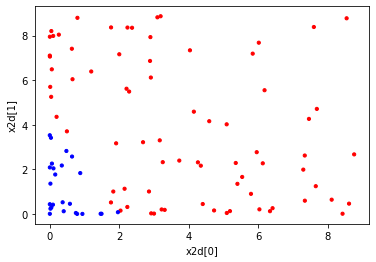

In [122]:
x2d=x_2_train
y2d=y_2_train
for i in range(100):
  x2d[i][0] = x2d[i][0]*x2d[i][0]
  x2d[i][1] = x2d[i][1]*x2d[i][1]

plt.scatter(x2d[:,0], x2d[:,1], c=['red' if y_i == -1 else 'blue' for y_i in y2d], facecolors='none',s=10)
plt.xlabel('x2d[0]')
plt.ylabel('x2d[1]')

In [123]:
m2d,a2d,w2d,b2d,c2d=call_fun(x2d,y2d)
max_a2d=0.0
max_m2d=np.zeros((2,1))
max_w2d=0.0
max_b2d=0.0
max_c2d=0.0
for iq in range(len(a2d)):
  if a2d[iq]>max_a2d:
    max_a2d,max_m2d,max_w2d,max_b2d,max_c2d=a2d[iq],m2d[iq],w2d[iq],b2d[iq],c2d[iq]
  elif a2d[i]==max_a2d and m2d[i]>max_m2d:
    max_a2d,max_m2d,max_w2d,max_b2d,max_c2d=a2d[iq],m2d[iq],w2d[iq],b2d[iq],c2d[iq]
print('optimal accuracy is:', max_a2d)
print('optimal margin is:', max_m2d)
print('optimal weight is:', max_w2d)
print('optimal b is:', max_b2d)
print('optimal c is:', max_c2d)

Streaming output truncated to the last 5000 lines.
 6:  5.7562e+01  4.4431e+01  2e+01  2e-03  1e-03
 7:  5.8099e+01  4.7255e+01  1e+01  1e-03  5e-04
 8:  5.4435e+01  5.3371e+01  1e+00  3e-05  2e-05
 9:  5.3758e+01  5.3746e+01  1e-02  3e-07  2e-07
10:  5.3750e+01  5.3750e+01  1e-04  3e-09  2e-09
11:  5.3750e+01  5.3750e+01  1e-06  3e-11  2e-11
12:  5.3750e+01  5.3750e+01  1e-08  3e-13  2e-13
13:  5.3750e+01  5.3750e+01  1e-10  5e-15  3e-14
Optimal solution found.
Accuracy: 0.99
     pcost       dcost       gap    pres   dres
 0: -3.5753e+04  3.2568e+04  1e+05  5e+01  3e+01
 1:  4.3361e+03 -6.5862e+03  3e+04  8e+00  4e+00
 2:  9.6808e+02 -2.1306e+03  6e+03  2e+00  1e+00
 3:  3.4839e+02 -5.5240e+02  2e+03  4e-01  2e-01
 4:  1.4263e+02 -3.6576e+01  2e+02  4e-02  2e-02
 5:  6.4963e+01  3.5476e+01  4e+01  4e-03  2e-03
 6:  5.7759e+01  4.4609e+01  2e+01  2e-03  1e-03
 7:  5.8319e+01  4.7372e+01  1e+01  1e-03  5e-04
 8:  5.4677e+01  5.3556e+01  1e+00  3e-05  2e-05
 9:  5.3963e+01  5.3950e+01  

In [124]:
x_test_2d=np.zeros((50,2))
for i in range(50):
  a=np.random.uniform(-3,3)
  x_test_2d[i][0]=a*a
  b=np.random.uniform(-3,3)
  x_test_2d[i][1]=b*b
y_test_2d=np.zeros((50,1))
for i in range(50):
  y_test_2d[i]=new_predict(x_test_2d[i])
print(acc(x_test_2d,y_test_2d,max_b2d,max_w2d,50))

Accuracy: 0.86
0.86


In [0]:
parameters = {}
KERNEL_RBF=2
KERNEL_LINEAR=1
def gram_matrix(X, Y, kernel_type, gamma=0.5):
    K = np.zeros((X.shape[0], Y.shape[0]))   
    if kernel_type == KERNEL_LINEAR:
        for i, x in enumerate(X):
            for j, y in enumerate(Y):
                K[i, j] = np.dot(x.T, y)               
    elif kernel_type == KERNEL_RBF:
        for i, x in enumerate(X):
            for j, y in enumerate(Y):
                K[i, j] = np.exp(-gamma * np.linalg.norm(x - y) ** 2)      
    return K

def get_parameters(alphas,xl,yl):
    threshold = 1e-5 # Values greater than zero (some floating point tolerance)
    S = (alphas > threshold).reshape(-1, )
    w = np.dot(xl.T, alphas * yl)
    b = yl[S] - np.dot(xl[S], w) # b calculation
    b = np.mean(b)
    return w, b, S

def train_svm2(C,xt,yt):
    n, k = xt.shape
    y_matrix = yt.reshape(1, -1)
    H = np.dot(y_matrix.T, y_matrix) * gram_matrix(xt, xt, KERNEL_RBF )
    P = matrix(H)
    q = matrix(-np.ones((n, 1)))
    G = matrix(np.vstack((-np.eye((n)), np.eye(n))))
    h = matrix(np.vstack((np.zeros((n,1)), np.ones((n,1)) * C)))
    A = matrix(y_matrix)
    A = matrix(A, (1, n), 'd')
    b = matrix(np.zeros(1))   
    solvers.options['abstol'] = 1e-10
    solvers.options['reltol'] = 1e-10
    solvers.options['feastol'] = 1e-10
    return solvers.qp(P, q, G, h, A, b)

def call_fun2(x_vec,y_vec):
  margin=np.zeros((500,1))
  accuracy=np.zeros((500,1))
  w_vec=np.zeros((500,2))
  b_vec=np.zeros((500,1))
  w_opt=np.zeros((2,1))
  c_vec=np.zeros((500,1))
  b_opt=0
  C=0.000006
  iteration=200
  for it in range(iteration):
      print('iteration number is :', it)
      print('c is', C)
      x1=x_vec
      y1=y_vec
      svm_parameters = train_svm2(C,x1,y1)
      alphas = np.array(svm_parameters['x'])
      w, b, S = get_parameters(alphas,x1,y1)
      w_opt[0]=w[0]
      w_opt[1]=w[1]
      b_opt=b
      epsilon=acc(x_vec,y_vec,b_opt,w_opt,len(x_vec))
      margin_t = 1 / np.sqrt(np.sum(np.power(w_opt,2)))
      margin[it]=margin_t
      accuracy[it]=epsilon
      w_vec[it][0]=w_opt[0]
      w_vec[it][1]=w_opt[1]
      b_vec[it]=b_opt
      c_vec[it]=C
      C+=0.00001
  return margin,accuracy,w_vec,b_vec,c_vec

In [126]:
m2e,a2e,w2e,b2e,c2e=call_fun2(x_2_train,y_2_train)
max_a2e=0.0
max_m2e=np.zeros((2,1))
max_w2e=0.0
max_b2e=0.0
max_c2e=0.0
for i in range(len(a2e)):
  if a2e[i]>max_a2e:
    max_a2e,max_m2e,max_w2e,max_b2e,max_c2e=a2e[i],m2e[i],w2e[i],b2e[i],c2e[i]
  elif a2e[i]==max_a2e and m2e[i]>max_m2e:
    max_a2e,max_m2e,max_w2e,max_b2e,max_c2e=a2e[i],m2e[i],w2e[i],b2e[i],c2e[i]
print('optimal accuracy is:', max_a2e)
print('optimal margin is:', max_m2e)
print('optimal weight is:', max_w2e)
print('optimal b is:', max_b2e)
print('optimal c is:', max_c2e)

iteration number is : 0
c is 6e-06
     pcost       dcost       gap    pres   dres
 0: -6.9153e+00 -2.6248e+00  5e+02  2e+01  3e-16
 1: -3.2340e+00 -1.1522e+00  4e+01  2e+00  4e-16
 2: -5.3998e-02 -1.7491e-03  2e+00  8e-02  9e-16
 3: -8.4448e-04 -1.2727e-03  2e-02  8e-04  5e-16
 4: -2.9677e-04 -1.1561e-03  1e-03  1e-05  5e-16
 5: -2.9325e-04 -3.6796e-04  8e-05  3e-07  6e-16
 6: -2.9989e-04 -3.0079e-04  9e-07  4e-09  3e-16
 7: -2.9999e-04 -3.0002e-04  3e-08  1e-10  3e-16
 8: -2.9999e-04 -3.0000e-04  8e-09  3e-12  3e-16
 9: -3.0000e-04 -3.0000e-04  3e-09  5e-13  3e-16
10: -3.0000e-04 -3.0000e-04  4e-10  6e-14  3e-16
11: -3.0000e-04 -3.0000e-04  6e-11  6e-15  3e-16
Optimal solution found.
Accuracy: 0.75
iteration number is : 1
c is 1.6000000000000003e-05
     pcost       dcost       gap    pres   dres
 0: -6.9153e+00 -2.6266e+00  5e+02  2e+01  3e-16
 1: -3.2341e+00 -1.1541e+00  4e+01  2e+00  4e-16
 2: -5.4429e-02 -3.8713e-03  2e+00  8e-02  1e-15
 3: -1.3319e-03 -3.3875e-03  2e-02  8e-04  

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 9: -7.9996e-04 -8.0000e-04  4e-08  1e-10  2e-16
10: -7.9997e-04 -7.9997e-04  5e-09  5e-12  2e-16
11: -7.9997e-04 -7.9997e-04  1e-09  7e-13  3e-16
12: -7.9997e-04 -7.9997e-04  2e-10  1e-13  3e-16
13: -7.9997e-04 -7.9997e-04  3e-11  6e-15  2e-16
Optimal solution found.
Accuracy: 0.25
iteration number is : 2
c is 2.6000000000000002e-05
     pcost       dcost       gap    pres   dres
 0: -6.9154e+00 -2.6283e+00  5e+02  2e+01  3e-16
 1: -3.2342e+00 -1.1560e+00  4e+01  2e+00  4e-16
 2: -5.4859e-02 -5.9931e-03  2e+00  8e-02  1e-15
 3: -1.8192e-03 -5.4947e-03  2e-02  8e-04  6e-16
 4: -1.2492e-03 -3.9157e-03  3e-03  1e-05  5e-16
 5: -1.2895e-03 -1.3885e-03  1e-04  4e-07  4e-16
 6: -1.2997e-03 -1.3013e-03  2e-06  6e-09  3e-16
 7: -1.2999e-03 -1.3003e-03  4e-07  1e-09  3e-16
 8: -1.2999e-03 -1.3002e-03  3e-07  5e-10  2e-16
 9: -1.2999e-03 -1.3000e-03  5e-08  8e-11  3e-16
10: -1.2999e-03 -1.2999e-03  6e-09  3e-12  3e-16
11: -1.2999e-03 -1.2999e-03  9e-10  2e-13  3e-16
12: -1.2999e-03 -1.2999e-03 

In [127]:
x_test_2e=np.zeros((50,2))
for i in range(50):
  a=np.random.uniform(-3,3)
  x_test_2e[i][0]=a*a
  b=np.random.uniform(-3,3)
  x_test_2e[i][1]=b*b
y_test_2e=np.zeros((50,1))
for i in range(50):
  y_test_2e[i]=new_predict(x_test_2e[i])
print(acc(x_test_2e,y_test_2e,max_b2e,max_w2e,50))

Accuracy: 0.94
0.94
